# About The Notebook
We are going to collect and explore data of Coronavirus "COVID-19" spread in Sudan.

The notebook/data will be updated over time.

## Packages

In [1]:
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
import numpy as np
from textwrap import wrap
from matplotlib import ticker


%matplotlib inline

## Functions 
The functions used in the analysis

In [2]:
def PlotLine(df,x_data, figsize=(16,8)):
    
    """
    Plot a line graph using matplotlib 
    -Arguments:
        df: the data frame 
        x_data: x-axis data
        figsize: figure size to make chart small or big  
    -Return:
        Nothing just show the graph
    """
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=2)
    fig, ax = plt.subplots(figsize=figsize)
    data = df[x_data].value_counts().reset_index().sort_values(by='index')
    data['DataCount'] = data[x_data].cumsum()
    ax = sns.lineplot(x='index', y="DataCount", data=data,linewidth=2.5
        ,color=sns.xkcd_rgb['windows blue'],ax=ax,label='Infection Over Time',marker="<")
    ax = sns.lineplot(x='index', y=x_data, data=data,linewidth=2.5
                     , color="coral", ax=ax,label='Daily Infection',marker="<")
    plt.xticks(rotation=90)
    plt.ylabel('')
    plt.xlabel('')
    #ax.set(xticks=df.Date[2::2])
    sns.despine(left=True)
    plt.tight_layout()
    #plt.savefig('PlotLine.pdf', format='pdf', dpi=1200)

def PlotLine1(df,x_data, figsize=(16,8)):
    
    """
    Plot a line graph using matplotlib 
    -Arguments:
        df: the data frame 
        x_data: x-axis data
        figsize: figure size to make chart small or big  
    -Return:
        Nothing just show the graph
    """
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=2)
    fig, ax = plt.subplots(figsize=figsize)
    data = df[x_data].value_counts().reset_index().sort_values(by='index')
    data['DataCount'] = data[x_data].cumsum()
    ax = sns.lineplot(x='DataCount', y="DataCount", data=data,linewidth=2.5
        ,color=sns.xkcd_rgb['windows blue'],ax=ax,label='{}'.format(x_data),marker="<")
    plt.xticks(rotation=90)
    plt.ylabel('')
    plt.xlabel('')
    #ax.set(xticks=df.Date[2::2])
    sns.despine(left=True)
    plt.tight_layout()
    #plt.savefig('PlotLine.pdf', format='pdf', dpi=1200)
    

def BarChart(df,x_data,y_data, figsize=(10,4)):
    
    """
    Bar chart using seaborn 
    -Argumentss:
        df: the data frame 
        x_data: x-axis data 
        y_data: y-axis data
        figsize: figure size
    -Returns:
        Nothing just show the graph
    """
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=2)

    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x_data, y=y_data, data=df,linewidth=1.5,
                     color=sns.xkcd_rgb['windows blue'], edgecolor=".3")
    Sum = df.values[:,1].sum()
    for i,j in enumerate(df.values[:, 1]):
        ax.text(j + 0.01, i + .20,'('+ str(j) + ')Cases')
    plt.ylabel('')
    plt.xlabel('')
    labels = [ '\n'.join(wrap(k,10)) for k in df.values[:, 0]]
    x_value=['{:,.0f}'.format(x/Sum * 100) + '%' for x in ax.get_xticks()]
    ax.set_yticklabels(labels,fontsize=15)
    plt.xticks(list(plt.xticks()[0]))
    ax.set_xticklabels(x_value,fontsize=15)
    sns.despine(left=True)
    #ax.axes.set_title("COVID-19 Patients: Travelers vs Local Transmission",fontsize=20)
    plt.tight_layout()
    #plt.savefig('BarChart.pdf', format='pdf', dpi=1200)

    
def PieChart(df,x_data,figsize=(7, 5)):
    
    """
    Plot a pie chart using matplotlib 
    -Arguments:
        df: the data frame 
        x_data: x-axis data
    -Return:
        Nothing just show the graph
    """
    fig, ax = plt.subplots(figsize=figsize)


    explode=(0,0.1,0,0,0)
    Theme = plt.get_cmap('copper')
    
    X = df[x_data].value_counts()
    ax.set_prop_cycle("color", [Theme(1. * i / len(X.values))
                             for i in range(len(X.values))])

    my_circle=plt.Circle( (0,0), 0.6, color='white')
    plt.pie(X.values, labels=None,explode=explode)
    plt.gca().add_artist(my_circle)
    plt.legend(bbox_to_anchor=(0.95,.95), loc=2, borderaxespad=0,labels=X.index)
    plt.axis('equal')
    plt.tight_layout()
    #plt.savefig('PieChart.pdf', format='pdf', dpi=1200)
    plt.show()


## Data 
Check and load the data.

In [3]:
print(os.listdir('../data'))
df_number_of_cases = pd.read_csv('../data/NumberConfirmedOfCases.csv',dtype={'Date':'string'})
df_number_of_cases.head()
# fig, ax = plt.subplots(figsize=(24,4))

# plt.plot(df_number_of_cases['Cases'])
# plt.show()

['Population_age_structure.csv', '.ipynb_checkpoints', 'NumberConfirmedOfCases.csv']


,Date,Cases,Recovery,Death,Travel history,Age,Country,Gender,Town,State,Job
0,2020-03-12,1,0.0,1,Recent traveller,60.0,Sudan,Male,Khartoum,Khartoum,Doctor
1,2020-03-19,1,1.0,0,Recent traveller,NaN,Not identified,Male,Khartoum,Khartoum,Doctor
2,2020-03-23,1,1.0,0,Recent traveller,39.0,Sudan,Male,Khartoum,Khartoum,Doctor
3,2020-03-27,1,0.0,1,Recent traveller,47.0,India,Male,Khartoum,Khartoum,Doctor
4,2020-03-27,1,0.0,0,Recent traveller,60.0,Sudan,Male,Khartoum,Khartoum,Doctor


## Organise and Convert the Dataset
Show the data format and from the data file: convert `date` to the correct data type.

In [4]:
df_number_of_cases = pd.read_csv('../data/NumberConfirmedOfCases.csv',dtype={'Date':'string'})

df_number_of_cases['Date'] = df_number_of_cases.apply(lambda x: datetime.strptime(x['Date'], '%Y-%m-%d').date(), axis=1)
df_number_of_cases.head()

,Date,Cases,Recovery,Death,Travel history,Age,Country,Gender,Town,State,Job
0,2020-03-12,1,0.0,1,Recent traveller,60.0,Sudan,Male,Khartoum,Khartoum,Doctor
1,2020-03-19,1,1.0,0,Recent traveller,NaN,Not identified,Male,Khartoum,Khartoum,Doctor
2,2020-03-23,1,1.0,0,Recent traveller,39.0,Sudan,Male,Khartoum,Khartoum,Doctor
3,2020-03-27,1,0.0,1,Recent traveller,47.0,India,Male,Khartoum,Khartoum,Doctor
4,2020-03-27,1,0.0,0,Recent traveller,60.0,Sudan,Male,Khartoum,Khartoum,Doctor


In [5]:
df_number_of_cases['Travel history'].value_counts().reset_index()

,index,Travel history
0,Local transmission,19
1,Recent traveller,13


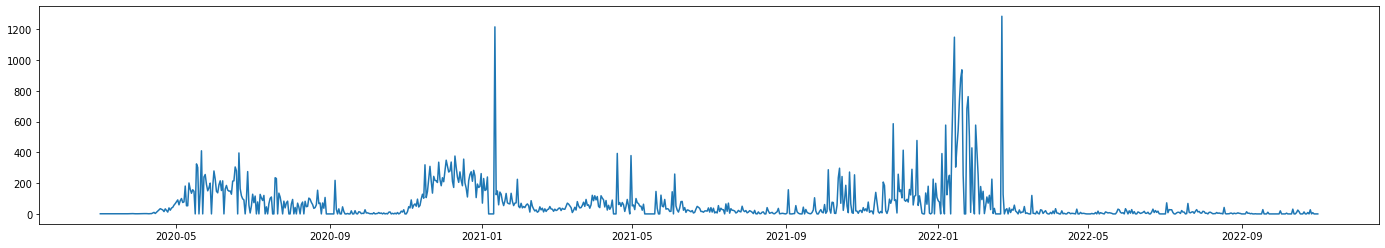

In [6]:
# df_number_of_cases.groupby(pd.Grouper(key='Cases', axis=0, freq='d')).sum()
df = df_number_of_cases
g = df.groupby('Date')

res = g['Cases'].sum()
# list(res)
fig, ax = plt.subplots(figsize=(24,4))

# df_number_of_cases.groupby('Date')
plt.plot(res)
plt.show()

# Visualizations

### Infections Over Time

Viusalize our data and let's see the over time  infections changes and daily infections.

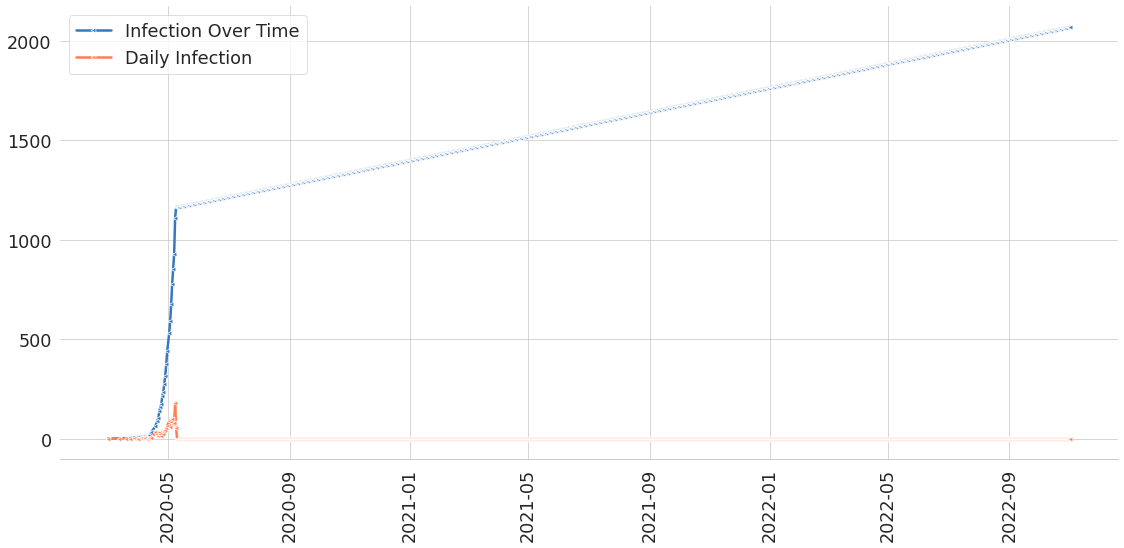

In [7]:
PlotLine(df_number_of_cases, 'Date')

# Location (State and Town)

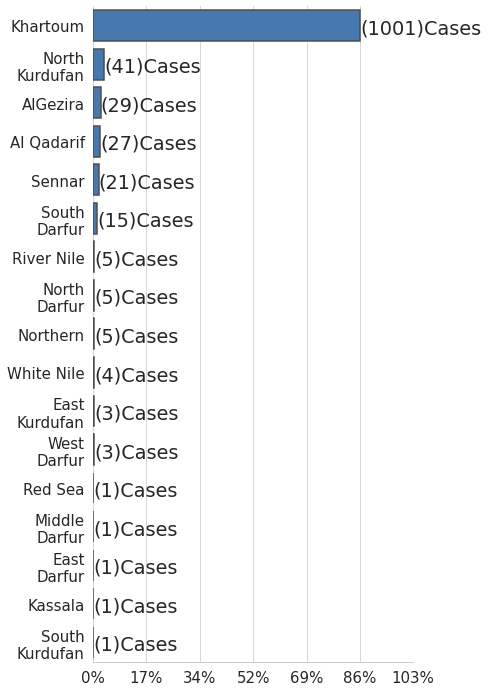

In [8]:
BarChart(df_number_of_cases['State'].value_counts().reset_index(),'State', 'index',figsize=(7, 10))

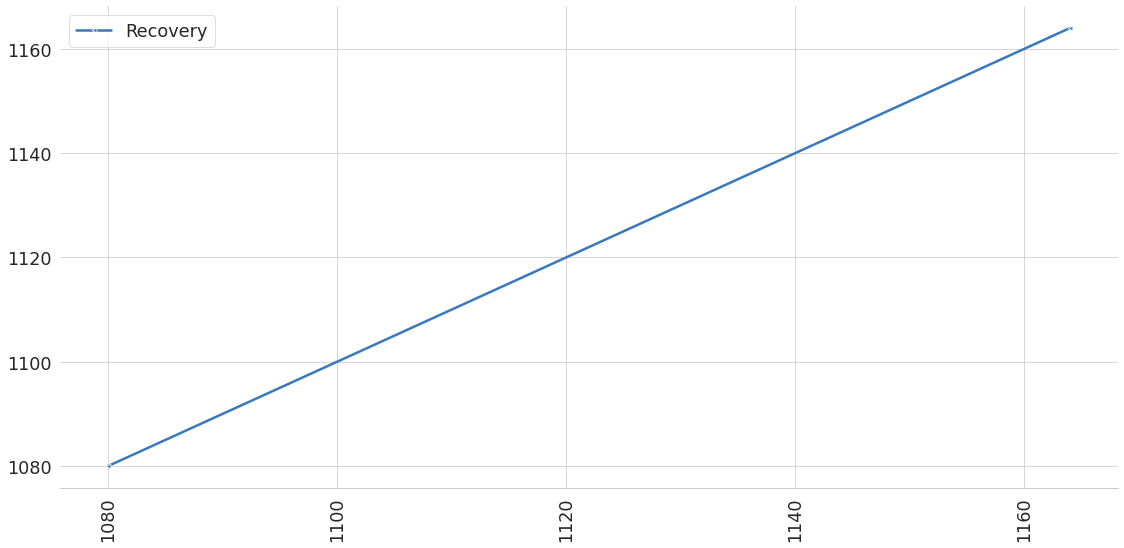

In [9]:
PlotLine1(df_number_of_cases, 'Recovery')

## Travel history 

This is a visuala on of the COVID-19 patient travel history

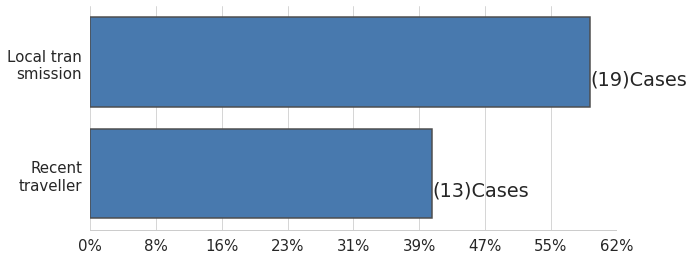

In [10]:
BarChart(df_number_of_cases['Travel history'].value_counts().reset_index(),'Travel history', 'index')

### Gender
The gender distribution of the COVID-19 patient.


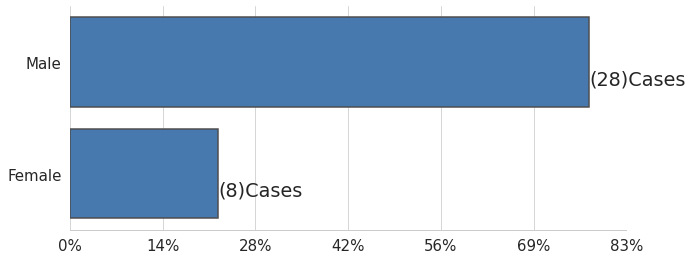

In [11]:
BarChart(df_number_of_cases['Gender'].value_counts().reset_index(),'Gender', 'index')

## Pations nationalties 

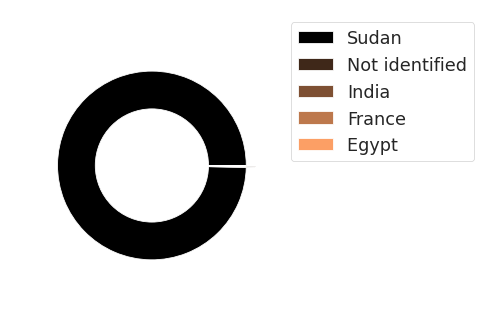

In [12]:
PieChart(df_number_of_cases, 'Country')

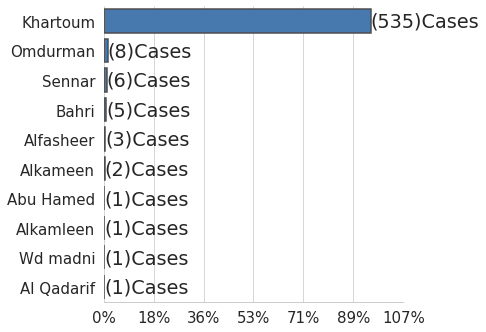

In [13]:
BarChart(df_number_of_cases['Town'].value_counts().reset_index(),'Town', 'index',figsize=(7, 5))